In [50]:
# Import all necessary packages
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pylab as plt

In [51]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [52]:
#Load data in dataframe
train_df= pd.read_csv('train.csv')
train_df.head()  

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [54]:
# Date is of object type. It needs to be converted to DateTime object. Let us also make the Date column as the index column
train_df= pd.read_csv('train.csv', index_col='Date')
train_df.index= pd.to_datetime(train_df.index)
train_df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [55]:
# sort by index (Ascending order) => Essential step in time series analysis
data= train_df.sort_index()
data.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


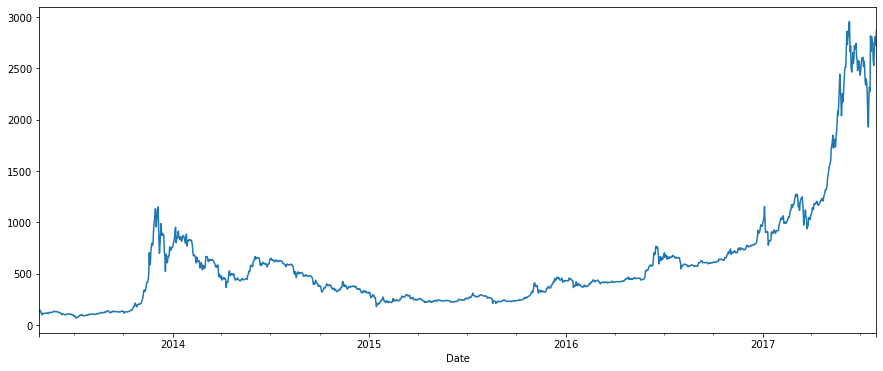

In [56]:
# Plot the closing value
data['Close'].plot()

In [57]:
# Extracting the Close column values
data= data['Close']
data.head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [58]:
data.size

1556

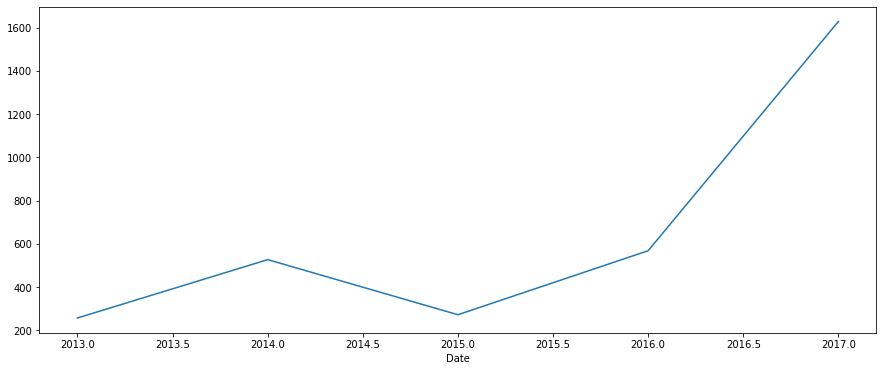

In [59]:
#grouping based on year
by_year= data.groupby(data.index.year).mean()
by_year.plot()

Price of bitcoin is steadily increasing and reached it's peak in 2017

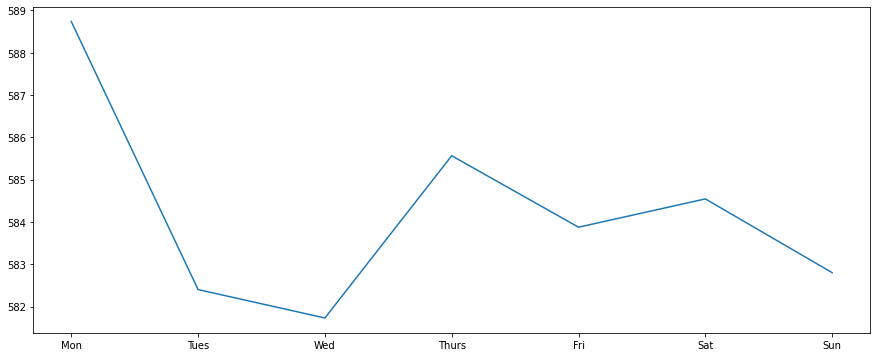

In [60]:
#grouping based on weekday or weekend. Analysing in which kinds of days does the bitcoin price soar
by_day= data.groupby(data.index.dayofweek).mean()
by_day.index= ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_day.plot()

Prices are highest on mondays

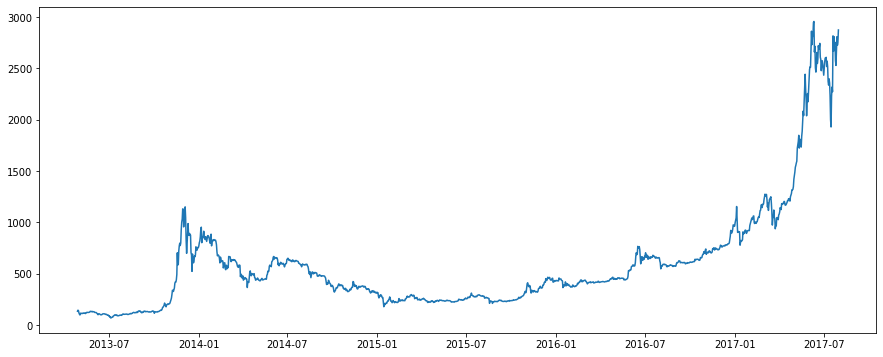

In [61]:
plt.plot(data)

In [62]:
#Dickey Fuller test to stationarity of data
from statsmodels.tsa.stattools import adfuller

def dickey_fuller_test(data):
  dickey_test= adfuller(data)
  print_res= pd.Series(dickey_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dickey_test[4].items():
    print_res['Critical Value (%s)'%key] = value
  print(print_res)  

dickey_fuller_test(data)

Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


p value is greater than 0.05 and test statistic value is much larger than ciritical value. hence data is not stationary.

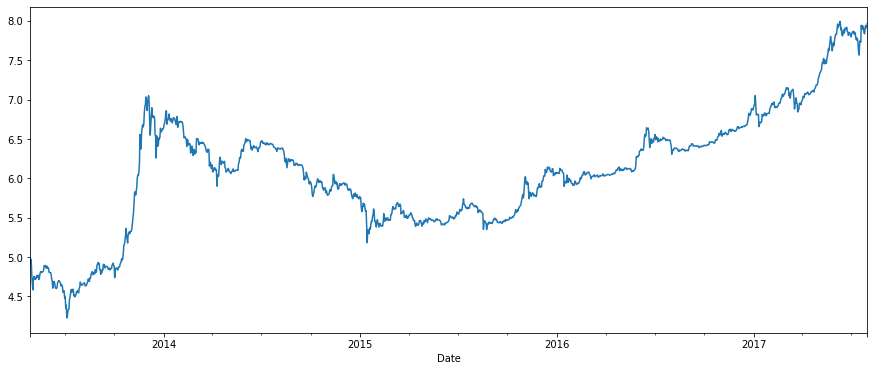

In [63]:
# Applying log tranformation to the data
data_log= np.log(data)
data_log.plot()

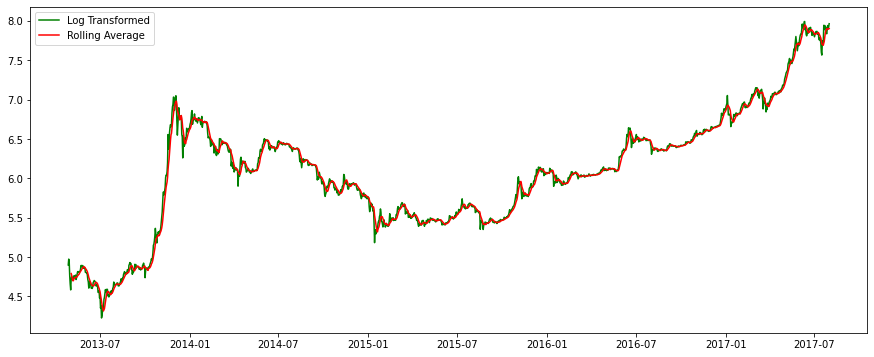

In [64]:
# Finding the rolling average of the data with a window size of 7 and plotting it against the corresponding log transformation.
# We use window size of 7 because we wish to calculate on a weekly basis
rolling_avg= data_log.rolling(window=7, center=False).mean()
plt.plot(data_log, color='green', label='Log Transformed')
plt.plot(rolling_avg, color='red', label='Rolling Average')
plt.legend(loc='best') # location of the labels is based on the best fit in the graph

In [65]:
rolling_avg.head(10)
# First 7 rows are NaN because it is not relevant

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [66]:
# Rolling difference
diff= data_log- rolling_avg
diff.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04   -0.067168
2013-05-05   -0.016366
2013-05-06   -0.011951
2013-05-07    0.012392
Name: Close, dtype: float64

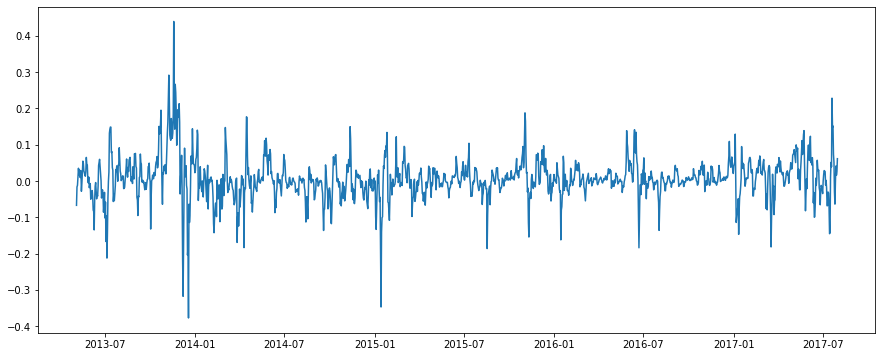

In [67]:
# Remove the NaN values
diff.dropna(inplace=True)
plt.plot(diff)

from the above graph, we see that the trend seems to be stationary but we will once again test with dickey fuller to confirm.

In [68]:
dickey_fuller_test(diff)

Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


p value is less than 0.05. so we can conclude that it is stationary now.

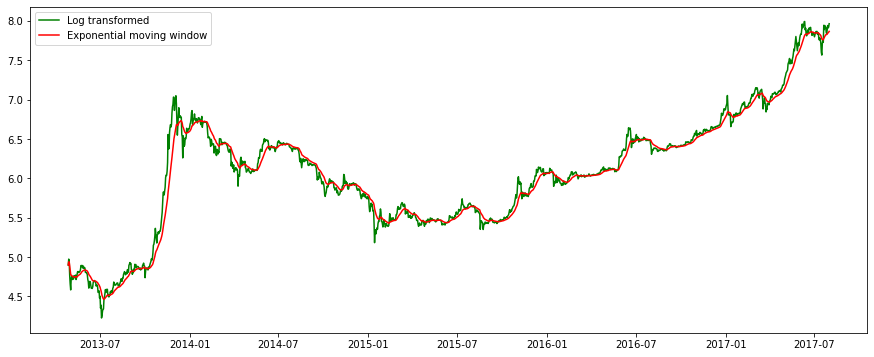

In [69]:
#To get better stationarity values we will use exponential weighted moving average
exp_avg= data_log.ewm(halflife=7).mean()
#Print comparison between the two
plt.plot(data_log, color='green', label='Log transformed')
plt.plot(exp_avg, color='red', label='Exponential moving window')
plt.legend(loc='best')

In [70]:
# Differencing
diff_exp= data_log- exp_avg
diff_exp.head(10)

Date
2013-04-28    0.000000
2013-04-29    0.035241
2013-04-30   -0.002432
2013-05-01   -0.124424
2013-05-02   -0.174892
2013-05-03   -0.196151
2013-05-04   -0.045125
2013-05-05   -0.012634
2013-05-06   -0.037198
2013-05-07   -0.037695
Name: Close, dtype: float64

In [71]:
# Test for stationarity in the new transformed data
dickey_fuller_test(diff_exp)

Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


Test statistic value is less than the critical value. Hence it is stationary.

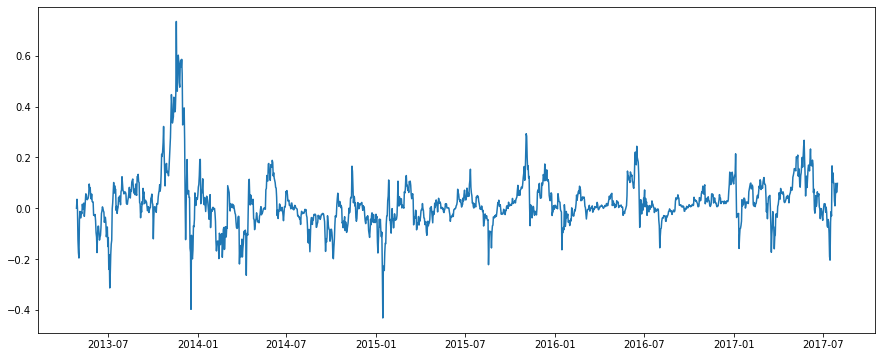

In [72]:
plt.plot(diff_exp)

In [73]:
# Seasonal Differencing
diff_trans= data_log - data_log.shift(7)
diff_trans.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

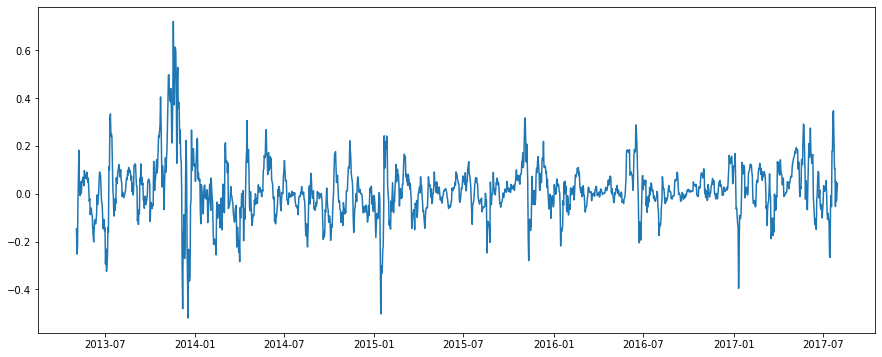

In [74]:
plt.plot(diff_trans)

In [75]:
diff_trans.isnull().sum()

7

In [76]:
diff_trans.dropna(inplace=True)

In [77]:
dickey_fuller_test(diff_trans)

Test Statistic                -6.523574e+00
p-value                        1.027774e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


TS value is much lesser than the critical value. So we can accept that it is stationary.

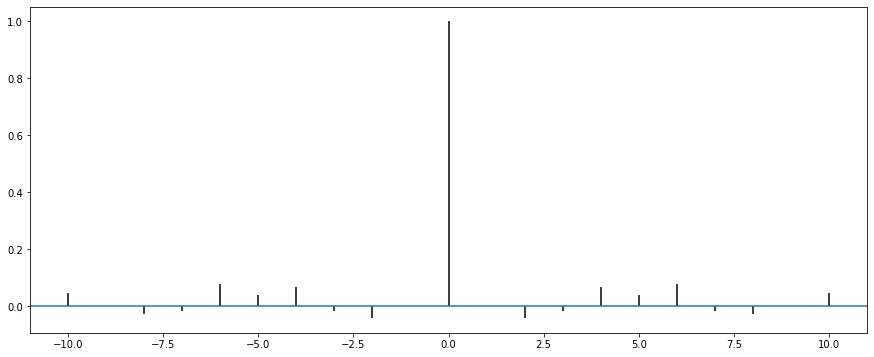

In [78]:
# Differencing with shift of 1
a= data_log- data_log.shift(1)
a.dropna(inplace=True)
plt.acorr(a)
plt.show()

In [79]:
dickey_fuller_test(a)

Test Statistic                -7.285034e+00
p-value                        1.466401e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.532000e+03
Critical Value (1%)           -3.434626e+00
Critical Value (5%)           -2.863428e+00
Critical Value (10%)          -2.567775e+00
dtype: float64


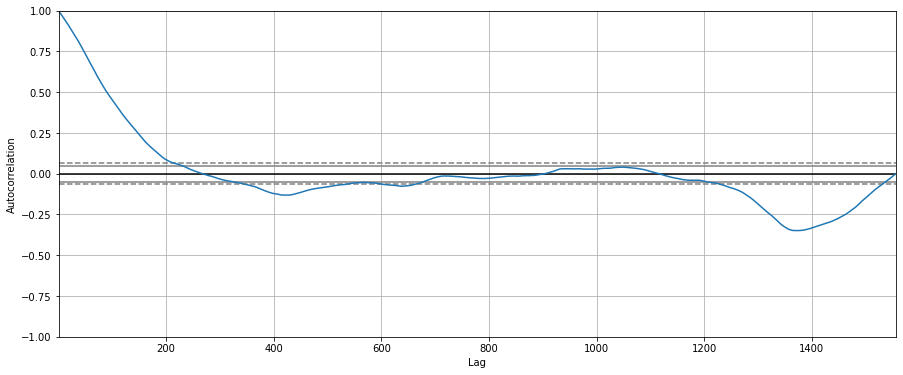

In [80]:
#Plot autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_log)
plt.show()

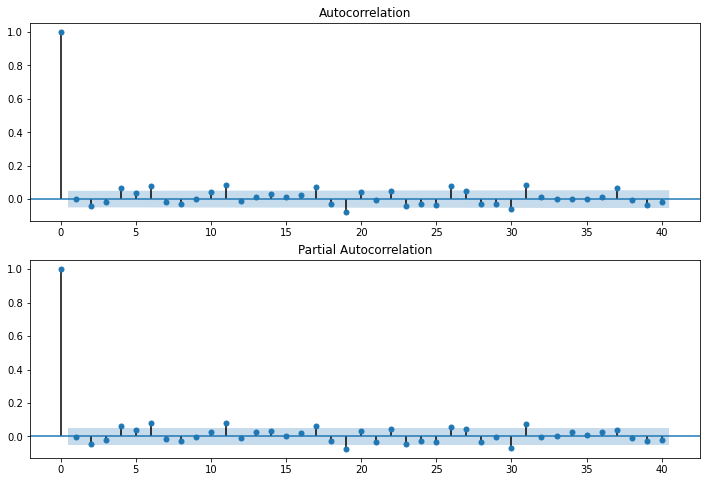

In [81]:
# Plotting the ACF and PACF plots for seasonal differencing of 7
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(a,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(a,lags=40,ax=ax2)

In [82]:
#p=4, d=1, q=4
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(diff_trans,order=(4,1,4))
model_fit=model.fit(disp=0)
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1548
Model:                 ARIMA(4, 1, 4)   Log Likelihood                2426.918
Method:                       css-mle   S.D. of innovations              0.050
Date:                Mon, 12 Apr 2021   AIC                          -4833.836
Time:                        17:45:11   BIC                          -4780.389
Sample:                    05-06-2013   HQIC                         -4813.957
                         - 07-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.002      0.129      0.897      -0.003       0.003
ar.L1.D.Close    -0.5174      0.027    -19.025      0.000      -0.571      -0.464
ar.L2.D.Close     0.0797      0.029      2.762      0.006       0.023       0.136
ar.L3.D.Close    -0.3997      0.027    -14.540      0.000      -0.454      -0.346
ar.L4.D.Close    -0.3975      0.024    -16.634      0.000      -0.444      -0.351
ma.L1.D.Close     0.5557      0.010     54.156      0.000       0.536       0.576
ma.L2.D.Close    -0.2506      0.012    -21.530      0.000      -0.273      -0.228
ma.L3.D.Close     0.5557      0.012     47.651      0.000       0.533       0.579
ma.L4.D.Close     0.9999      0.007    149.084      0.000       0.987       1.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7011           -1.0094j            1.2290           -0.1534
AR.2            0.7011           +1.0094j            1.2290            0.1534
AR.3           -1.2038           -0.4649j            1.2904           -0.4413
AR.4           -1.2038           +0.4649j            1.2904            0.4413
MA.1            0.6239           -0.7815j            1.0000           -0.1428
MA.2            0.6239           +0.7815j            1.0000            0.1428
MA.3           -0.9018           -0.4322j            1.0000           -0.4289
MA.4           -0.9018           +0.4322j            1.0000            0.4289
-----------------------------------------------------------------------------
"""

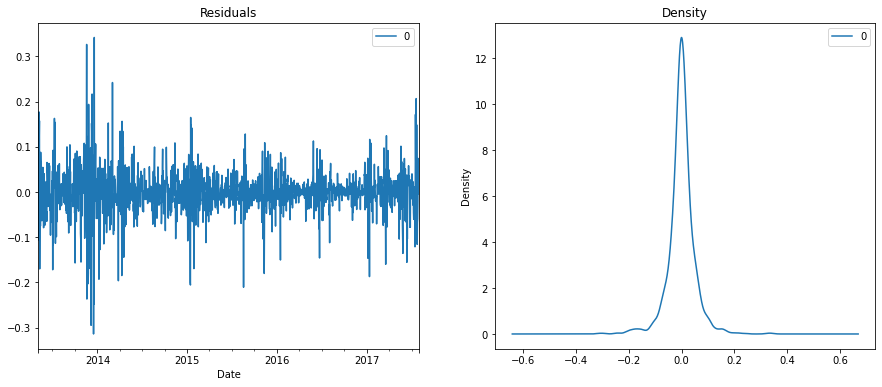

In [83]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Mean is almost 0 and uniform variance.


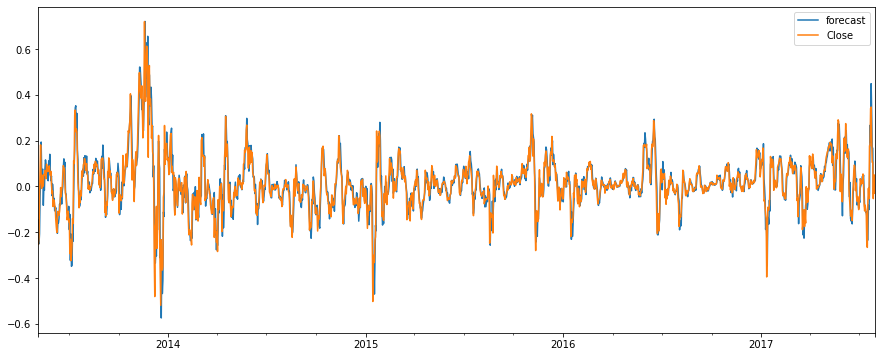

In [84]:
# Actual vs fitted(predicted)
model_fit.plot_predict(dynamic=False)
plt.show()

In [89]:
# Using Auto ARIMA library in Python for forecasting
!pip install pmdarima

     |████████████████████████████████| 1.5MB 19.2MB/s 
     |████████████████████████████████| 9.5MB 47.4MB/s 
     |████████████████████████████████| 2.1MB 32.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22


In [90]:
# Auto ARIMA forecast
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


In [92]:
data.head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [97]:
model = pm.auto_arima(data.values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (for ARIMA m=1)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15665.275, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15662.940, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15664.334, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15664.303, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15664.430, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.578 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1556
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7829.470
Date:                Mon, 12 Apr 2021   AIC                          15662.940
Time:                        17:54:48   BIC                          15673.639
Sample:                             0   HQIC                         15666.919
                               - 1556                                  

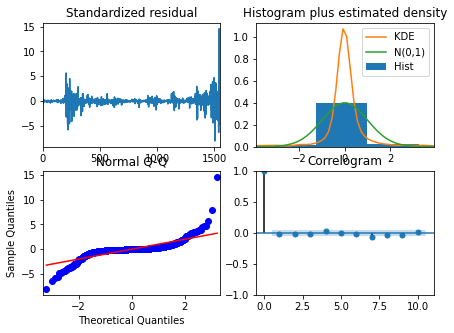

In [98]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

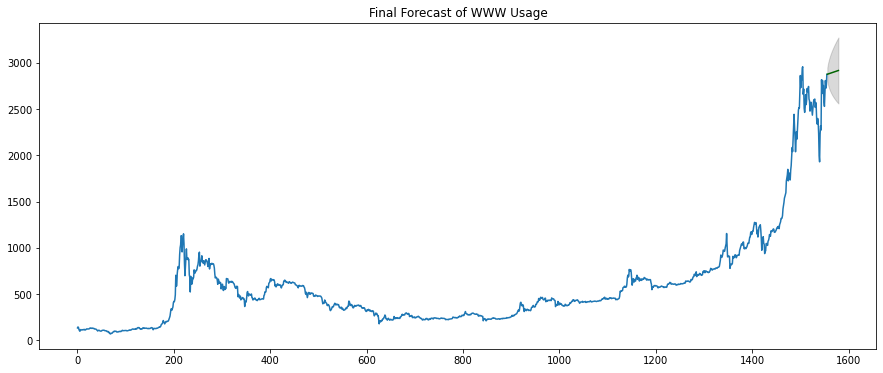

In [99]:
# Forecast for next two years
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data.values), len(data.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

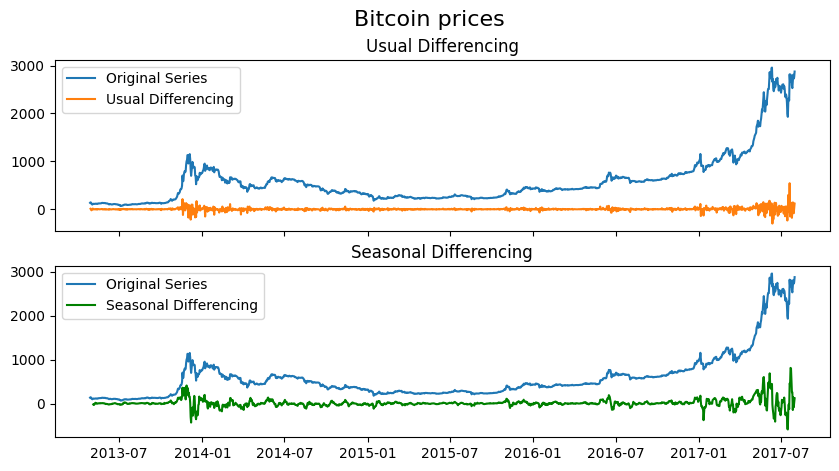

In [105]:
# SARIMA model
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(7), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Bitcoin prices', fontsize=16)
plt.show()

In [108]:
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=7,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=5.64 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=18480.770, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=16054.888, Time=4.28 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=17386.486, Time=3.29 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=18502.424, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=16609.231, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=15971.274, Time=10.99 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=16.01 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=8.16 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=18402.771, Time=6.68 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=15973.181, Time=16.87 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=15973.182, Time=16.37 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=17327.772, Time=8.08 sec
 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=15972.218, Time=22.25 sec
 ARIMA(1,0,0)(2,1,0)[7]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1556
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -7980.637
Date:                           Mon, 12 Apr 2021   AIC                          15971.274
Time:                                   19:27:04   BIC                          15998.001
Sample:                                        0   HQIC                         15981.215
                                          - 1556                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6127      1.191      1.354      0.176      -0.722       3.947
ar.L1          0.9389      0.004    257.344      0.000       0.932       0.946
ar.S.L7       -0.7242      0.013    -57.403      0.000      -0.749      -0.699
ar.S.L14      -0.2613      0.014    -18.135      0.000      -0.289      -0.233
sigma2      1742.7115     17.751     98.176      0.000    1707.920    1777.503
===================================================================================
Ljung-Box (Q):                      262.74   Jarque-Bera (JB):             69766.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.48   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

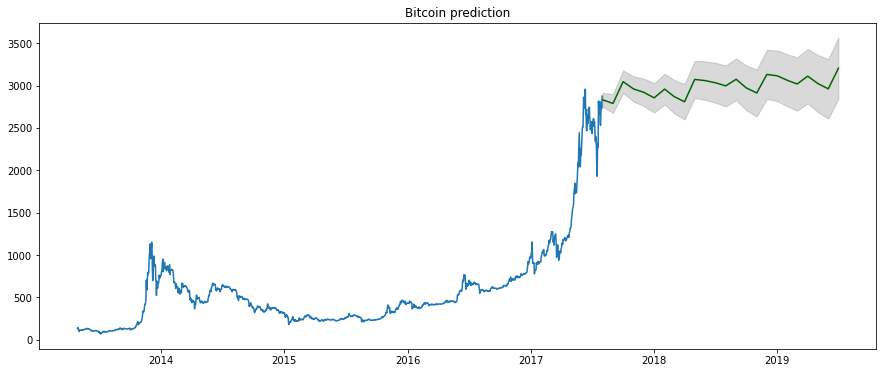

In [109]:
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Bitcoin prediction")
plt.show()